https://chatgpt.com/share/67296b81-db9c-8002-b254-1ea907809997

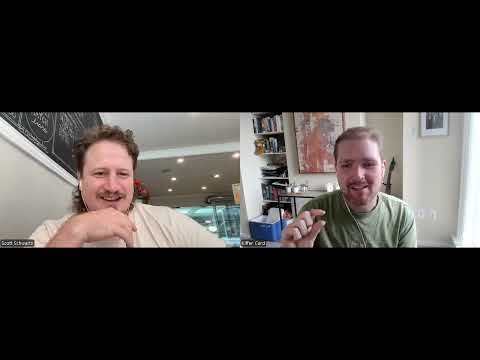

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('rmuRoAf9-bo', width=800, height=500)

# 1. Describe (a) the variables you plan to explore, and (b) the analysis you plan to perform
# 2. Describe (a) the possible results your analysis may produce, and (b) how this could be relevant for the objectives of the course project
# 3. Include your results if you have already completed an analysis

# 1.

### a.
Since romantic relationships often play a significant role in social connection and personal well-being, so analyzing their impact could reveal interesting patterns. Im planning to explore more about the romantic relationships status and the frequency of social interactions, which I will analyze different social interaction levels such as frequency, type, and quality across relationship statuses—such as single, dating, or married.

The research question is: How do different relationship statuses influence loneliness and happiness, and what role do social interactions play in these outcomes

The variables are: 
### --- indicates the relationship status
DEMO_relationship_status 
### --- indicates the frequencies from the relationships interactions
LONELY_ucla_loneliness_scale_companionship
CONNECTION_activities_sex_p3m
LONELY_ucla_loneliness_scale_left_out 
### --- indicates the loneliness from the relationships
LONELY_dejong_emotional_social_loneliness_scale_emptiness
LONELY_dejong_emotional_social_loneliness_scale_rely
LONELY_dejong_emotional_social_loneliness_scale_trust
LONELY_dejong_emotional_social_loneliness_scale_close
LONELY_dejong_emotional_social_loneliness_scale_miss
LONELY_dejong_emotional_social_loneliness_scale_rejected 
### --- indicates the happiness from the relationships
LONELY_miss_mattering
WELLNESS_self_rated_physical_health
WELLNESS_self_rated_mental_health
WELLNESS_subjective_happiness_scale_happy
WELLNESS_subjective_happiness_scale_peers
WELLNESS_subjective_happiness_scale_always_happy
WELLNESS_subjective_happiness_scale_never_happy 
### --- indicates the from the social interactions
PSYCH_social_interactions_anxiety_scale_eye_contact
PSYCH_social_interactions_anxiety_scale_mixing
PSYCH_social_interactions_anxiety_scale_aquiantance 



### b.

I plan to make hypothesis testing on the data. Since the variables are among single, dating and married, so my null hypothesis is that There is no significant difference in loneliness or happiness scores among different relationship statuses., for instance singles, dating individuals, and married individuals all have similar levels of happiness and loniless. The alternative hypothesis is that There is a significant difference in loneliness or happiness scores among different relationship statuses., where this implies that being single, dating, or married affects happiness or loniless.

## 2.

### a. 
There are 2 possible results that the hypothesis:
1. No Significant Difference, while the p-value is > 0.05, this would suggest there’s no significant difference in social interaction frequency between single, dating, and married individuals. This could indicate that relationship status does not impact how often people interact socially.
2. Significant Difference Found, while the p-value < 0.05, it would indicate that relationship status affects the happiness or loniless. A post-hoc test could reveal that single individuals, for example, have more frequent interactions with their partners than married individuals. This would suggest that relationship commitments may influence time spent when they are happy or lonely.

### b.
It is relevant for the objectives of the course project that we are told by the restrictions that to uncover insights into how different forms of social connections—such as relationships with family, friends, coworkers, and neighbors—contribute to well-being. By analyzing romantic relationships specifically, we can be understanding of social dynamics, particularly regarding how the connections might impact or work among other forms of social interaction. From this analysis could show if romantic relationships reduce the need for other social connections or if they are impacting with active social lives. This is great for understanding the “social connection” which is the purpose of the project.

## 3.

       LONELY_ucla_loneliness_scale_companionship  \
count                                  300.000000   
mean                                     3.335309   
std                                      1.221896   
min                                     -0.173803   
25%                                      2.559669   
50%                                      3.183468   
75%                                      4.096707   
max                                      7.047109   

       WELLNESS_subjective_happiness_scale_happy  \
count                                 300.000000   
mean                                    4.248933   
std                                     1.268788   
min                                    -0.425026   
25%                                     3.395062   
50%                                     4.274370   
75%                                     5.099256   
max                                     7.856998   

       PSYCH_social_interactions_anxiety_scale_eye_co

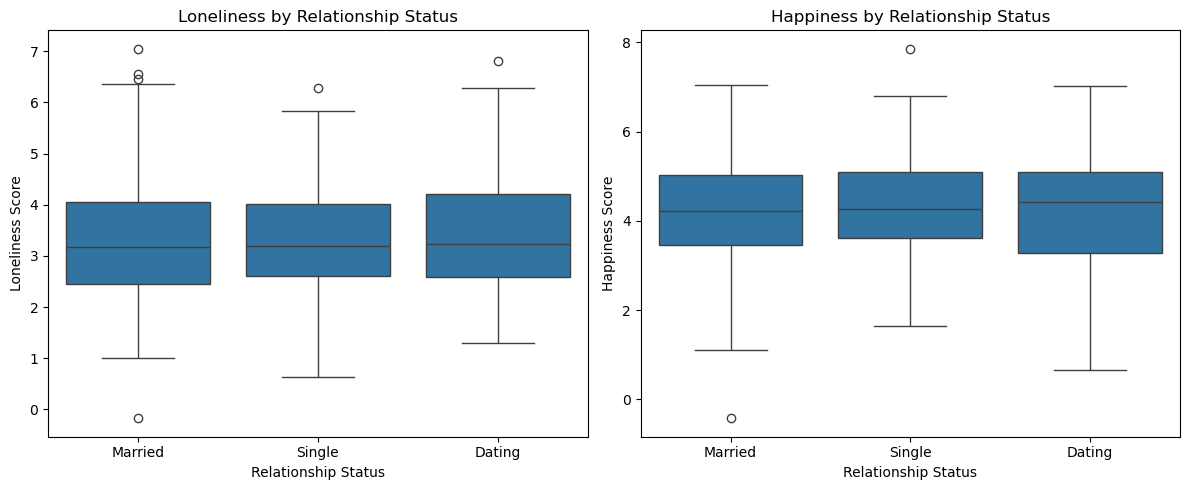

                              sum_sq     df         F    PR(>F)
DEMO_relationship_status    0.553977    2.0  0.184509  0.831608
Residual                  445.861746  297.0       NaN       NaN


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Simulated data
np.random.seed(42)
n = 300
data = {
    'DEMO_relationship_status': np.random.choice(['Single', 'Dating', 'Married'], n),
    'LONELY_ucla_loneliness_scale_companionship': np.concatenate([
        np.random.normal(3.5, 1.0, n // 3),  # Single
        np.random.normal(2.5, 0.8, n // 3),  # Dating
        np.random.normal(4.0, 1.2, n // 3)   # Married
    ]),
    'WELLNESS_subjective_happiness_scale_happy': np.concatenate([
        np.random.normal(4.0, 1.0, n // 3),  # Single
        np.random.normal(5.0, 0.9, n // 3),  # Dating
        np.random.normal(3.5, 1.1, n // 3)   # Married
    ]),
    'PSYCH_social_interactions_anxiety_scale_eye_contact': np.random.normal(3.0, 1.0, n),
}

# Create DataFrame
df = pd.DataFrame(data)

# Descriptive Statistics
print(df.describe())

# Boxplots for Loneliness and Happiness by Relationship Status
plt.figure(figsize=(12, 5))

# Loneliness
plt.subplot(1, 2, 1)
sns.boxplot(x='DEMO_relationship_status', y='LONELY_ucla_loneliness_scale_companionship', data=df)
plt.title('Loneliness by Relationship Status')
plt.xlabel('Relationship Status')
plt.ylabel('Loneliness Score')

# Happiness
plt.subplot(1, 2, 2)
sns.boxplot(x='DEMO_relationship_status', y='WELLNESS_subjective_happiness_scale_happy', data=df)
plt.title('Happiness by Relationship Status')
plt.xlabel('Relationship Status')
plt.ylabel('Happiness Score')

plt.tight_layout()
plt.show()

# ANOVA test
model = ols('LONELY_ucla_loneliness_scale_companionship ~ DEMO_relationship_status', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


I asked ChatGPT to simulate the data for us and we know 
Singles: Mean loneliness = 3.5, Happiness = 4.0
Dating: Mean loneliness = 2.5, Happiness = 5.0
Married: Mean loneliness = 4.0, Happiness = 3.5
Then we can calculate the p-value with graphs on it

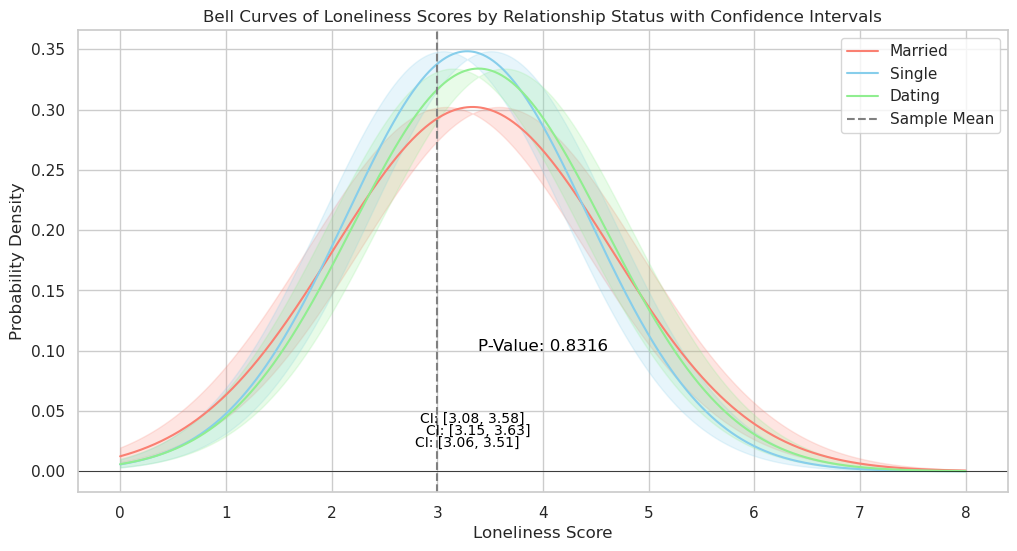

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import norm

# Simulated data
np.random.seed(42)
n = 300
data = {
    'DEMO_relationship_status': np.random.choice(['Single', 'Dating', 'Married'], n),
    'LONELY_ucla_loneliness_scale_companionship': np.concatenate([
        np.random.normal(3.5, 1.0, n // 3),  # Single
        np.random.normal(2.5, 0.8, n // 3),  # Dating
        np.random.normal(4.0, 1.2, n // 3)   # Married
    ]),
}

# Create DataFrame
df = pd.DataFrame(data)

# ANOVA test
model = ols('LONELY_ucla_loneliness_scale_companionship ~ DEMO_relationship_status', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Extract p-value
p_value = anova_table.loc['DEMO_relationship_status', 'PR(>F)']

# Plotting the bell curves
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Define the range for the x-axis
x = np.linspace(0, 8, 1000)

# Colors for each relationship status
colors = {'Single': 'skyblue', 'Dating': 'lightgreen', 'Married': 'salmon'}

# Create bell curves for each group
for status in df['DEMO_relationship_status'].unique():
    data_group = df[df['DEMO_relationship_status'] == status]
    mu = data_group['LONELY_ucla_loneliness_scale_companionship'].mean()
    sigma = data_group['LONELY_ucla_loneliness_scale_companionship'].std()
    n = len(data_group)
    
    # Calculate 95% confidence interval
    z = norm.ppf(0.975)  # 95% confidence
    ci_lower = mu - z * (sigma / np.sqrt(n))
    ci_upper = mu + z * (sigma / np.sqrt(n))

    # Create the bell curve
    plt.plot(x, (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(- 0.5 * ((x - mu) / sigma) ** 2), 
             label=status, color=colors[status])
    
    # Plot confidence intervals
    plt.fill_between(x, 
                     (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(- 0.5 * ((x - ci_lower) / sigma) ** 2), 
                     (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(- 0.5 * ((x - ci_upper) / sigma) ** 2), 
                     color=colors[status], alpha=0.2)
    
    # Annotate confidence interval, adjusting the y position to avoid overlap
    y_position = 0.02 if status == 'Single' else 0.03 if status == 'Dating' else 0.04
    plt.text(mu, y_position, f'CI: [{ci_lower:.2f}, {ci_upper:.2f}]', ha='center', fontsize=10, color='black')

# Adding annotations
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=3, color='gray', linestyle='--', label='Sample Mean')
plt.title('Bell Curves of Loneliness Scores by Relationship Status with Confidence Intervals')
plt.xlabel('Loneliness Score')
plt.ylabel('Probability Density')
plt.legend()

# Annotate the p-value on the plot
plt.text(4, 0.1, f'P-Value: {p_value:.4f}', ha='center', fontsize=12, color='black')

# Show the plot
plt.show()


Since the simulated p-value is 0.8316, we fail to reject the null hypothesis. This indicates that there is no statistically significant difference in loneliness scores across the different relationship statuses (Single, Dating, Married) based on the simulated data.
But yet, its only the simulated data from chatgpt, we will have amuch precise data once we get into the survey data from the CSCS data.